# Lógica Fuzzy - Previsão de Doença Cardíaca

Felipe Gabriel Comin Scheffel - RA117306  
Douglas Kenji Sakakibara - RA117741

Universidade Estadual de Maringá  
Departamento de Informática  
Ciência da Computação  

Aprendizado de Máquina e Modelagem de Conhecimento Incerto  
Prof. Wagner Igarashi

## Introdução
A lógica fuzzy, conhecida também como lógica difusa, é uma abordagem lógica utilizada para capturar e modelar informações imprecisas e incertas, para serem utilizadas em sistemas. Diferente a lógica tradicional, a lógica difusa é baseada na teoria dos conjuntos fuzzy, que oferece uma representação mais flexível, permitindo representar e medir o grau de pertêncimento de elementos em relação aos conjuntos, principalmente, em problemas que as fronteiras entre os conjuntos não são bem definidas.

## Definição do problema e seleção de variáveis

O objetivo deste trabalho é desenvolver um protótipo de um sistema utilizando a lógica difusa para identificar e representar a porcentagem de chances que um paciente tem de possuir uma doença cardíaca. Foram escolhidas quatro variáveis discretas para a entrada: idade, visto que cidadãos mais velhos possuem incidência maior de doenças cardiovasculares; nível de colesterol LDL medido no sangue, que indica possibilidade de formação de obstrução nos canais sanguíneos; e pressão sanguínea sístolica e taxa cardíaca (ambas em repouso), indicadores de dificuldade do coração de bombear sangue. Com base nessas variáveis, será gerada uma saída entre 0 e 1, indicando a probabilidade do paciente apresentar doença cardíaca.

## Implementação
O sistema implementado é utilizado para identificar e representar a porcentagem de chances que um paciente tem de possuir uma doênça cardíaca a partir valores de entrada definidos. Para a implementação foi utilizado a linguagem Python junto com as bibliotecas `numpy` para operações com matrizes, `pyplot` para gerar os gráficos, `random` para gerar valores aleatórios e `pandas` para a manipulação do dataset dos casos de teste.

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import pandas as pd

 A implementação do sistema baseado na lógica fuzzy, foi dividida em três etapas:
* Fuzzificação
* Inferência
* Defuzzificação 

### Fuzzificação
A etapa de fuzzificação consiste na conversão de valores de entrada precisos em valores do domínio difuso. Esse processo atribui graus de pertinência para os elementos de entrada por meio das funções de pertinência. Essa etapa engloba a definição das variáveis de entrada e saída e a definição das funções de pertinência. A transformação dos valores de entradas (conjunto crisp) em valores difusos, é feita utilizando as funções de pertinência das variáveis de entrada.

#### Representação dos conjuntos difusos

São definidas as seguintes funções para facilitar a definição dos conjuntos de pertinência:

In [37]:
def trifp(x, a, b, c):
    return max(min((x - a) / (b - a), (c - x) / (c - b)), 0)

def lhalftrapfp(x, a, b):
    return 1 if x <= a else max((b - x) / (b - a), 0)
    
def rhalftrapfp(x, a, b):
    return 1 if x >= b else max((x - a) / (b - a), 0)

def trapfp(x, a, b, c, d):
    return max(min((x - a) / (b - a), 1, (d - x) / (d - c)), 0)

- Idade

São definidos 3 conjuntos de pertinência: JOVEM, MEIA_IDADE e IDOSO. Foram utilizadas funções de pertinência trapezoidais.

In [243]:
JOVEM = 0
MEIA_IDADE = 1
IDOSO = 2

def fps_idade(idade):
    return lhalftrapfp(idade, 25, 40), trapfp(idade, 27, 43, 47, 63), rhalftrapfp(idade, 50, 65)

for i in range(5):
    idade = rd.randint(20, 80)
    print(f'Idade: {idade}, fps_idade = {fps_idade(idade)}')

Idade: 40, fps_idade = (0.0, 0.8125, 0)
Idade: 68, fps_idade = (0, 0, 1)
Idade: 35, fps_idade = (0.3333333333333333, 0.5, 0)
Idade: 22, fps_idade = (1, 0, 0)
Idade: 63, fps_idade = (0, 0.0, 0.8666666666666667)


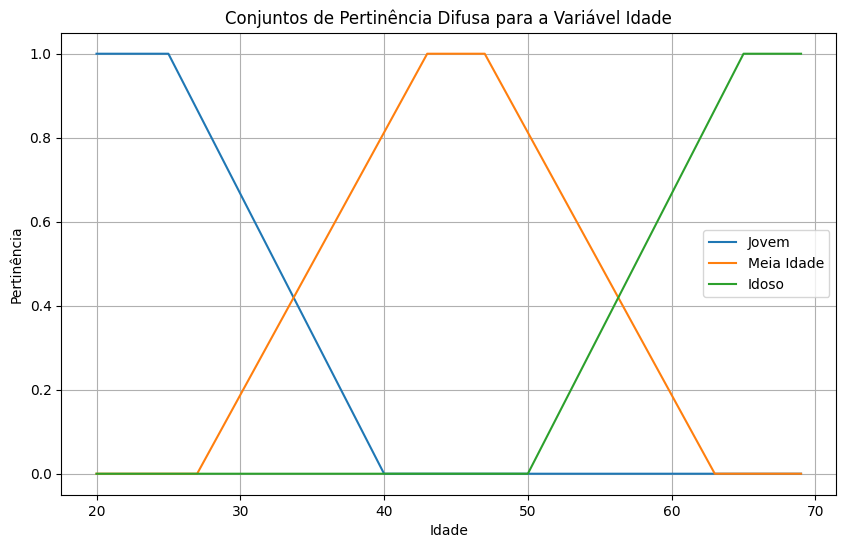

In [244]:
def plot_fuzzy_idade():
    sample_values = np.arange(20, 70, 1)

    fps_values = [fps_idade(value) for value in sample_values]
    
    jovem_values = [value[0] for value in fps_values]
    meia_idade_values = [value[1] for value in fps_values]
    idoso_values = [value[2] for value in fps_values]

    plt.figure(figsize=(10, 6))

    plt.plot(sample_values, jovem_values, label='Jovem')
    plt.plot(sample_values, meia_idade_values, label='Meia Idade')
    plt.plot(sample_values, idoso_values, label='Idoso')

    plt.title('Conjuntos de Pertinência Difusa para a Variável Idade')
    plt.xlabel('Idade')
    plt.ylabel('Pertinência')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fuzzy_idade()

- Colesterol

São definidos 4 conjuntos de pertinência: DESEJÁVEL, LIMÌTROFE, ALTO e MUITO ALTO. Para o conjunto LIMÍTROFE foi utilizada uma função de pertinência triangular por ser uma "transição" com limites não bem definidos. Para os outros conjuntos, foram utilizadas funções trapezoidais.

In [384]:
DESEJAVEL = 0
LIMITROFE = 1
ALTO = 2
MUITO_ALTO = 3

def fps_colesterol(colesterol):
    return lhalftrapfp(colesterol, 180, 195), trifp(colesterol, 185, 195, 220), trapfp(colesterol, 205, 225, 250, 300), rhalftrapfp(colesterol, 280, 305)

for i in range(5):
    colesterol = rd.randint(170, 310)
    print(f'Colesterol: {colesterol}, fps_colesterol = {fps_colesterol(colesterol)}')

Colesterol: 187, fps_colesterol = (0.5333333333333333, 0.2, 0, 0)
Colesterol: 281, fps_colesterol = (0, 0, 0.38, 0.04)
Colesterol: 266, fps_colesterol = (0, 0, 0.68, 0)
Colesterol: 225, fps_colesterol = (0, 0, 1.0, 0)
Colesterol: 300, fps_colesterol = (0, 0, 0.0, 0.8)


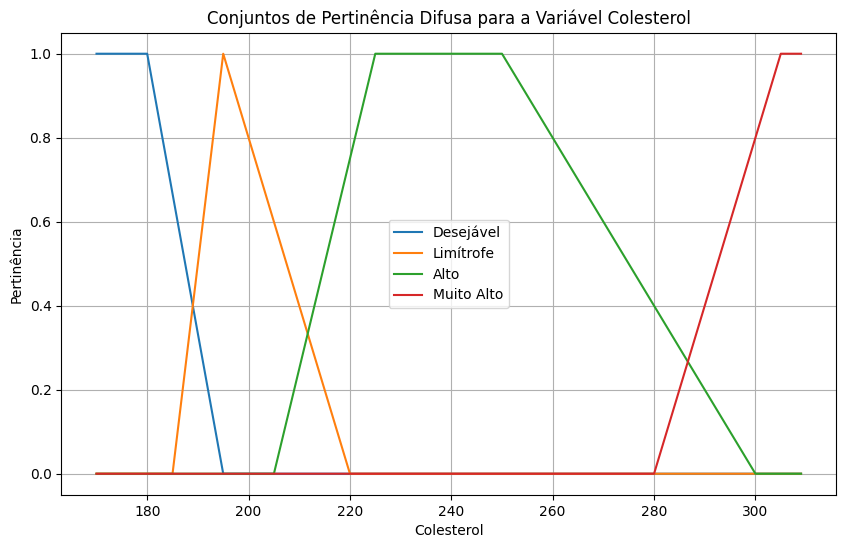

In [385]:
def plot_fuzzy_colesterol():
    sample_values = np.arange(170, 310, 1)
    
    fps_values = [fps_colesterol(value) for value in sample_values]
    
    desejavel_values = [value[0] for value in fps_values]
    limitrofe_values = [value[1] for value in fps_values]
    alto_values = [value[2] for value in fps_values]
    muito_alto_values = [value[3] for value in fps_values]

    plt.figure(figsize=(10, 6))

    plt.plot(sample_values, desejavel_values, label='Desejável')
    plt.plot(sample_values, limitrofe_values, label='Limítrofe')
    plt.plot(sample_values, alto_values, label='Alto')
    plt.plot(sample_values, muito_alto_values, label='Muito Alto')

    plt.title('Conjuntos de Pertinência Difusa para a Variável Colesterol')
    plt.xlabel('Colesterol')
    plt.ylabel('Pertinência')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fuzzy_colesterol()

- Pressão

São definidos 4 conjuntos de pertinência: NORMAL, PRÉ-HIPERTENSÃO, HIPERTENSÃO LEVE e HIPERTENSÃO GRAVE. Foram utilizadas funções de permanência triangulares, exceto para os conjuntos das "bordas", por ser uma medida que varia muito de instante para instante.

In [239]:
PRESSAO_NORMAL = 0
PRE_HIPERTENSAO = 1
HIPERTENSAO_LEVE = 2
HIPERTENSAO_GRAVE = 3

def fps_pressao(pressao):
    return lhalftrapfp(pressao, 105, 135), trifp(pressao, 123, 130, 155), trifp(pressao, 135, 165, 195), rhalftrapfp(pressao, 166, 198)

for i in range(5):
    pressao = rd.randint(100, 210)
    print(f'Pressao: {pressao}, fps_pressao = {fps_pressao(pressao)}')

Pressao: 142, fps_pressao = (0, 0.52, 0.23333333333333334, 0)
Pressao: 118, fps_pressao = (0.5666666666666667, 0, 0, 0)
Pressao: 138, fps_pressao = (0, 0.68, 0.1, 0)
Pressao: 123, fps_pressao = (0.4, 0.0, 0, 0)
Pressao: 147, fps_pressao = (0, 0.32, 0.4, 0)


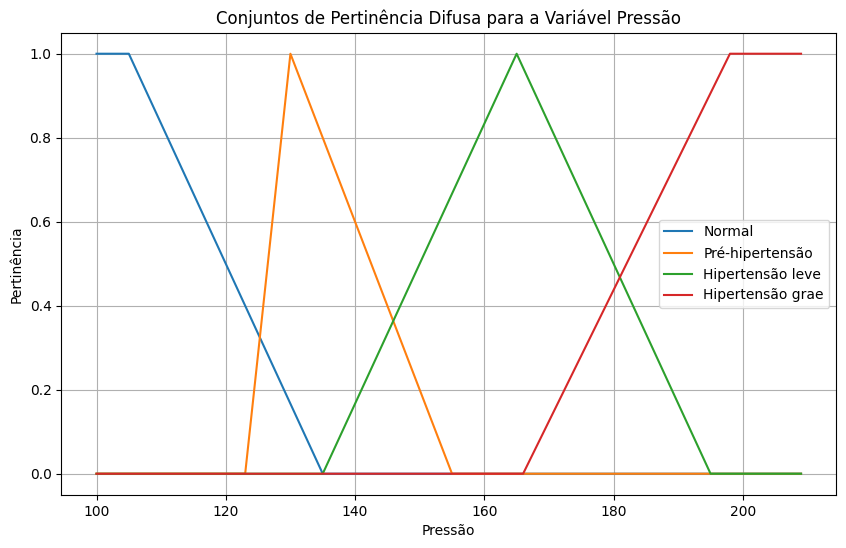

In [240]:
def plot_fuzzy_pressao():
    sample_values = np.arange(100, 210, 1)
    
    fps_values = [fps_pressao(value) for value in sample_values]
    
    normal_values = [value[0] for value in fps_values]
    pre_values = [value[1] for value in fps_values]
    leve_values = [value[2] for value in fps_values]
    grave_values = [value[3] for value in fps_values]

    plt.figure(figsize=(10, 6))

    plt.plot(sample_values, normal_values, label='Normal')
    plt.plot(sample_values, pre_values, label='Pré-hipertensão')
    plt.plot(sample_values, leve_values, label='Hipertensão leve')
    plt.plot(sample_values, grave_values, label='Hipertensão grae')

    plt.title('Conjuntos de Pertinência Difusa para a Variável Pressão')
    plt.xlabel('Pressão')
    plt.ylabel('Pertinência')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fuzzy_pressao()

- Taxa cardíaca

São definidos 3 conjuntos de pertinência: BOA, NORMAL e RUIM. Foram utilizadas funções de permanência trapezoidais.

In [389]:
BOA = 0
TAXA_NORMAL = 1
RUIM = 2

def fps_taxa(taxa):
    return lhalftrapfp(taxa, 150, 190), trapfp(taxa, 160, 190, 195, 210), rhalftrapfp(taxa, 200, 220)

for i in range(5):
    taxa = rd.randint(140, 230)
    print(f'Taxa: {taxa}, fps_taxa = {fps_taxa(taxa)}')

Taxa: 174, fps_taxa = (0.4, 0.4666666666666667, 0)
Taxa: 227, fps_taxa = (0, 0, 1)
Taxa: 198, fps_taxa = (0, 0.8, 0)
Taxa: 190, fps_taxa = (0.0, 1.0, 0)
Taxa: 200, fps_taxa = (0, 0.6666666666666666, 0.0)


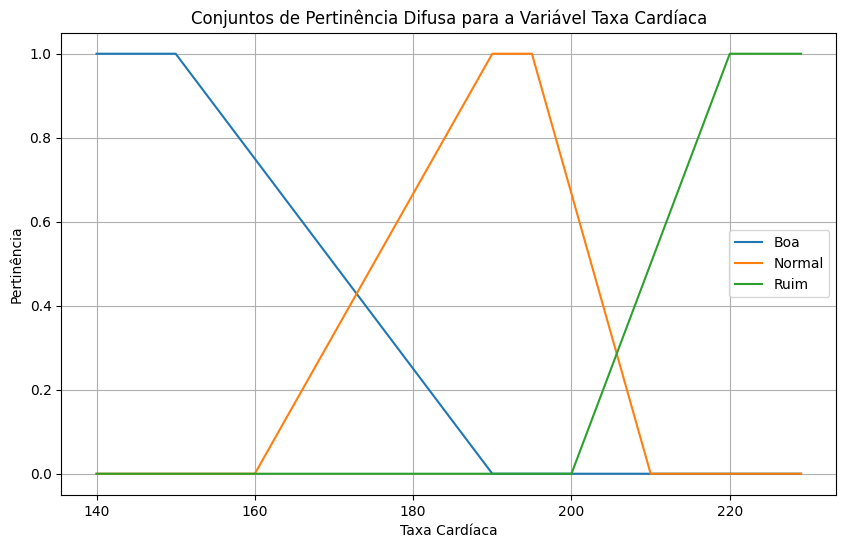

In [390]:
def plot_fuzzy_taxa():
    sample_values = np.arange(140, 230, 1)

    fps_values = [fps_taxa(value) for value in sample_values]
    
    boa_values = [value[0] for value in fps_values]
    normal_values = [value[1] for value in fps_values]
    idoso_values = [value[2] for value in fps_values]

    plt.figure(figsize=(10, 6))

    plt.plot(sample_values, boa_values, label='Boa')
    plt.plot(sample_values, normal_values, label='Normal')
    plt.plot(sample_values, idoso_values, label='Ruim')

    plt.title('Conjuntos de Pertinência Difusa para a Variável Taxa Cardíaca')
    plt.xlabel('Taxa Cardíaca')
    plt.ylabel('Pertinência')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fuzzy_taxa()

- Doença cardíaca

Para a variável de saída, que se trata de uma probabilidade, foram definidos três conjuntos de pertinência: BAIXA, MEDIA e ALTA. Foram utilizadas funções de pertinência triangulares.

In [356]:
BAIXA = 0
MEDIA = 1
ALTA = 2

def fps_doenca_cardiaca(prob):
    return lhalftrapfp(prob, 20, 45), trifp(prob, 25, 50, 75), rhalftrapfp(prob, 55, 75)

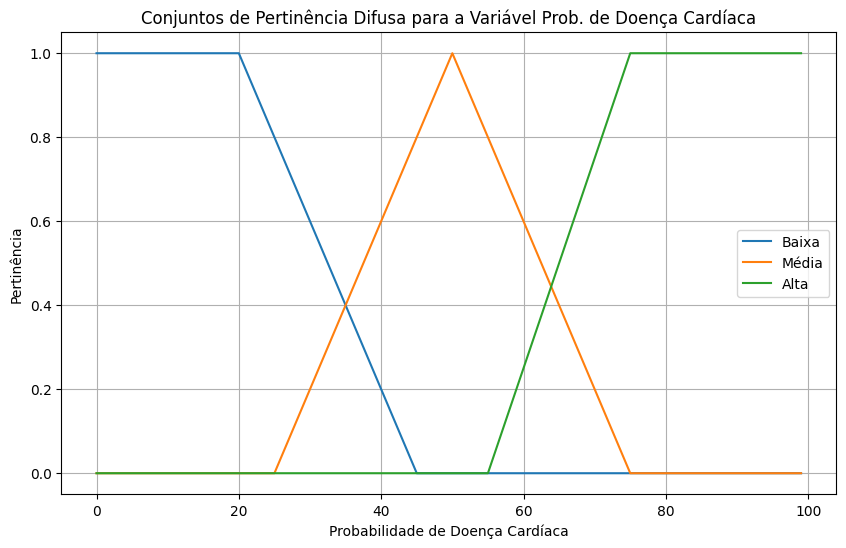

In [163]:
def plot_fuzzy_doenca():
    sample_values = np.arange(0, 100, 1)

    fps_values = [fps_doenca_cardiaca(value) for value in sample_values]
    
    baixa_values = [value[0] for value in fps_values]
    media_values = [value[1] for value in fps_values]
    alta_values = [value[2] for value in fps_values]

    plt.figure(figsize=(10, 6))

    plt.plot(sample_values, baixa_values, label='Baixa')
    plt.plot(sample_values, media_values, label='Média')
    plt.plot(sample_values, alta_values, label='Alta')

    plt.title('Conjuntos de Pertinência Difusa para a Variável Prob. de Doença Cardíaca')
    plt.xlabel('Probabilidade de Doença Cardíaca')
    plt.ylabel('Pertinência')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_fuzzy_doenca()

### Inferência

A inferência é a etapa onde as regras fuzzy são aplicadas para determinar a saída do sistema de acordo com as entradas difusas fornecidas a partir da etapa de fuzzificação. As regras são implicações lógicas que relacionam conjuntos fuzzy de entrada com os de saída, definidas a partir de sentenças linguisticas.

Se v é A, w é B, x é C, y é D, então z é E (sentença lógica), onde A, B, C e D são conjuntos fuzzy de entrada e E o conjunto fuzzy de saída. 

Para as variáveis definidas, na definição das regras ocorre uma combinação de premissas conhecidas do conjunto de entrada, gerando o conjunto de saída fuzzy.

In [353]:
def inferencia_doenca_cardiaca(pert_idade, pert_colesterol, pert_pressao, pert_taxa):
    # print(pert_idade, pert_colesterol, pert_pressao, pert_taxa)
    # print("")
    infere_alta = [
        # Se tem 2 sintomas graves
        min(pert_colesterol[MUITO_ALTO], pert_pressao[HIPERTENSAO_GRAVE]),
        # Se tem 1 sintoma grave e não é (jovem e tem pressão normal e tem taxa boa) - ou seja, tem apenas 1 sintoma grave e de resto é saudável
        min(pert_colesterol[MUITO_ALTO], 1 - min(pert_idade[JOVEM], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA])),
        min(pert_pressao[HIPERTENSAO_GRAVE], 1 - min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_taxa[BOA])),
        # Se é idoso, e tem (1 sintoma leve ou taxa ruim) e não tem (algum pré sintoma e taxa boa) ou (dois pré sintomas e taxa normal)
        min(pert_idade[IDOSO], max(min(pert_colesterol[ALTO], 1 - min(pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA])),
                                   min(pert_pressao[HIPERTENSAO_LEVE], 1 - min(pert_colesterol[DESEJAVEL], pert_taxa[BOA])),
                                   min(pert_taxa[RUIM], 1 - min(pert_pressao[PRESSAO_NORMAL], pert_colesterol[DESEJAVEL])),
                                   min(pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]))),
        # Se tem colesterol alto e tem (hipertensão leve ou taxa ruim) e não é (jovem e tem taxa boa ou pressão normal) ou (é de meia idade, com pre hipertensão e taxa normal)
        min(pert_colesterol[ALTO], max(min(pert_pressao[HIPERTENSAO_LEVE], 1 - min(pert_idade[JOVEM], pert_taxa[BOA])),
                                       min(pert_taxa[RUIM], 1 - min(pert_idade[JOVEM], pert_pressao[PRESSAO_NORMAL])),
                                       min(pert_idade[MEIA_IDADE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]))),
        # Se tem hipertensão leve e tem taxa ruim e não é (jovem e tem colesterol baixo) ou (é de meia idade, com colesterol limitrofe e taxa normal)
        min(pert_pressao[HIPERTENSAO_LEVE], max(pert_taxa[RUIM], 1 - min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL]),
                                                min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_taxa[TAXA_NORMAL]))),
        # Se tem taxa ruim, é de meia idade, tem 2 pré sintomas
        min(pert_taxa[RUIM], pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO])
    ]
    infere_media = [
        # Se tem um sintoma grave, mas é jovem e não tem outro pré-sintoma e tem taxa boa
        min(pert_colesterol[MUITO_ALTO], pert_idade[JOVEM], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_pressao[HIPERTENSAO_GRAVE], pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_taxa[BOA]),
        # Se é idoso e tem (um sintoma leve, mas não tem outro pré sintoma e tem taxa boa) ou tem (um pré sintoma ou taxa normal)
        min(pert_idade[IDOSO], max(min(pert_colesterol[ALTO], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
                                   min(pert_pressao[HIPERTENSAO_LEVE], pert_colesterol[DESEJAVEL], pert_taxa[BOA]),
                                   min(pert_taxa[RUIM], pert_pressao[PRESSAO_NORMAL], pert_colesterol[DESEJAVEL]))),
        # Se tem colesterol alto e ou (tem hipertensao leve, mas é jovem e tem taxa boa) ou (tem taxa ruim, mas é jovem e tem pressão normal)
        min(pert_colesterol[ALTO], max(min(pert_pressao[HIPERTENSAO_LEVE], pert_idade[JOVEM], pert_taxa[BOA]),
                                       min(pert_taxa[RUIM], pert_idade[JOVEM], pert_pressao[PRESSAO_NORMAL]))),
        # Se tem hipertensão leve e taxa ruim, mas é jovem e tem colesterol desejavel)
        min(pert_pressao[HIPERTENSAO_LEVE], pert_taxa[RUIM], pert_idade[JOVEM], pert_colesterol[DESEJAVEL]),
        # Se é de meia idade e tem 2 pré sintomas ou taxa normal
        min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[MEIA_IDADE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]),
        # Se tem 2 pré sintomas e taxa normal
        min(pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]),
        # Se é idoso e tem 2 pré sintomas e/ou 1 pré sintoma e taxa normal
        min(pert_idade[IDOSO], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[IDOSO], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[IDOSO], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[IDOSO], pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[IDOSO], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[IDOSO], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]),
        # Se tem colesterol alto e é de meia idade e tem taxa normal ou pré hipertensão, e/ou é jovem mas tem taxa normal e pré hipertensao
        min(pert_idade[MEIA_IDADE], pert_colesterol[ALTO], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[ALTO], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[ALTO], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[ALTO], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[ALTO], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[JOVEM], pert_colesterol[ALTO], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]),
        # Se tem hipertensao leve e é de meia idade e tem colesterol limitrofe ou taxa normal, ou é jovem mas tem taxa normal e colesterol limitrofe
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[BOA]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[HIPERTENSAO_LEVE], pert_taxa[TAXA_NORMAL]),
        # Se tem taxa ruim e é de meia idade e tem um pré sintoma, e/ou 2 pré sintomas
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[RUIM]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[RUIM]),
        min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[RUIM]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[RUIM]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[RUIM]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[RUIM])
    ]
    infere_baixa = [
        # Se tem um sintoma leve ou é idoso ou tem taxa ruim, mas de resto está saudavel
        min(pert_idade[IDOSO], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_colesterol[ALTO], pert_idade[JOVEM], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_pressao[HIPERTENSAO_LEVE], pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_taxa[BOA]),
        min(pert_taxa[RUIM], pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL]),
        # Se tem um pré sintoma ou é de meia idade ou tem taxa normal, mas de resto está saudável
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        # Se é de meia idade e tem um pré sintoma ou taxa normal
        min(pert_idade[MEIA_IDADE], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[BOA]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[MEIA_IDADE], pert_colesterol[DESEJAVEL], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        # Se tem dois pré sintomas ou um pré sintoma e taxa normal
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[PRE_HIPERTENSAO], pert_taxa[BOA]),
        min(pert_idade[JOVEM], pert_colesterol[LIMITROFE], pert_pressao[PRESSAO_NORMAL], pert_taxa[TAXA_NORMAL]),
        min(pert_idade[JOVEM], pert_colesterol[DESEJAVEL], pert_pressao[PRE_HIPERTENSAO], pert_taxa[TAXA_NORMAL]),
    ]

    # for i in range(len(infere_alta)):
    #     if infere_alta[i] > 0:
    #         print(f"Regra A{i + 1}: {infere_alta[i]}", end=", ")

    # for i in range(len(infere_media)):
    #     if infere_media[i] > 0:
    #         print(f"Regra M{i + 1}: {infere_media[i]}", end=", ")

    # for i in range(len(infere_baixa)):
    #     if infere_baixa[i] > 0:
    #         print(f"Regra B{i + 1}: {infere_baixa[i]}", end=", ")

    # print("")

    return (max(infere_baixa), max(infere_media), max(infere_alta))

for i in range(5):
    idade = rd.randint(20, 80)
    colesterol = rd.randint(100, 210)
    pressao = rd.randint(100, 210)
    taxa = rd.randint(60, 90)
    print(f'\nCaso {i}: idade {idade}, colesterol {colesterol}, pressao {pressao}, taxa {taxa}')
    print(inferencia_doenca_cardiaca(fps_idade(idade), fps_colesterol(colesterol), fps_pressao(pressao), fps_taxa(taxa)))


Caso 0: idade 25, colesterol 103, pressao 131, taxa 72
(0.9, 0, 0)

Caso 1: idade 30, colesterol 107, pressao 159, taxa 68
(0.5, 0.5, 0.33333333333333337)

Caso 2: idade 71, colesterol 161, pressao 177, taxa 82
(0, 0, 0.7333333333333333)

Caso 3: idade 53, colesterol 128, pressao 192, taxa 78
(0, 0.43333333333333335, 0.8125)

Caso 4: idade 38, colesterol 127, pressao 174, taxa 67
(0.13333333333333333, 0.43333333333333335, 0.7)


### Defuzzificação
A defuzzificação é a última etapa de um sistema fuzzy, na qual é feito uma interpretação do conjunto de saída obtido através da aplicação das regras fuzzy na etapa de inferência, com objetivo de obter um resultado numérico para o sistema. Esse processo converte os conjuntos resultantes da inferência em um resultado concreto. Na implementação, foi utilizado o método centróide, também conhecido como centro de gravidade, que gera um resultado para o sistema calculando o ponto médio ponderado dos valores do conjunto de saída de acordo com os graus de pertinência associados a cada valor. A fórmula para o cálculo do centro de gravidade é dado por: $$ C = \frac{\sum_{i} \mu(A_i) \cdot x_i}{\sum_{i} \mu(A_i)} \ $$



Onde: 
- C é o centro de gravidade.
- $ \mu(A_i) \ $ são os conjuntos fuzzy de saída.
- $ \sum_{i} \mu(A_i) \ $ é o grau de pertinência relacionada a cada conjunto fuzzy.
- $ x_i \ $ representa cada valor possível da variável de saída.


In [370]:
def defuzz(pert_doenca):
    result = 0
    ponder = 0
    if pert_doenca[BAIXA] > 0:
        result += (10 + 20) * pert_doenca[BAIXA]
        ponder += 2 * pert_doenca[BAIXA]
        if pert_doenca[MEDIA] == 0:
            result += (30 + 40 + 50) * pert_doenca[BAIXA]
            ponder += 3 * pert_doenca[BAIXA]
    if pert_doenca[MEDIA] > 0:
        result += (30 + 40 + 50) * pert_doenca[MEDIA]
        ponder += 3 * pert_doenca[MEDIA]
        if pert_doenca[ALTA] == 0:
            result += (60 + 70) * pert_doenca[MEDIA]
            ponder += 2 * pert_doenca[MEDIA]
    if pert_doenca[ALTA] > 0:
        result += (60 + 70 + 80 + 90 + 100) * pert_doenca[ALTA]
        ponder += 5 * pert_doenca[ALTA]
    return result / ponder

idade = 38
colesterol = 127
pressao = 174
taxa = 67
pert_doenca = inferencia_doenca_cardiaca(fps_idade(idade), fps_colesterol(colesterol), fps_pressao(pressao), fps_taxa(taxa))
print(f'Resultado inferência (fuzzy): {pert_doenca}')
print(f'Resultado inferência (crisp): {defuzz(pert_doenca)}')

Resultado inferência (fuzzy): (0.13333333333333333, 0.43333333333333335, 0.7)
Resultado inferência (crisp): 66.31578947368422


### Casos de teste

Será utilizada um dataset obtido no kaggle, [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). No dataset estão presentes as colunas das quatro variáveis de entrada utilizadas no problema, além de uma coluna `target`, que denota se o paciente apresentou doença cardíaca ou não.

In [400]:
dataset = pd.read_csv('./heart.csv')
dataset = dataset[['age', 'chol', 'trtbps', 'thalachh', 'output']]
dataset

,age,chol,trtbps,thalachh,output
0,63,233,145,150,1
1,37,250,130,187,1
2,41,204,130,172,1
3,56,236,120,178,1
4,57,354,120,163,1
...,...,...,...,...,...
298,57,241,140,123,0
299,45,264,110,132,0
300,68,193,144,141,0
301,57,131,130,115,0


Gerando os resultados das funções de pertinência (fuzzyficação)

In [402]:
dataset['pert_idade'] = dataset.apply(lambda x: fps_idade(x['age']), axis=1)
dataset['pert_colesterol'] = dataset.apply(lambda x: fps_colesterol(x['chol']), axis=1)
dataset['pert_pressao'] = dataset.apply(lambda x: fps_pressao(x['trtbps']), axis=1)
dataset['pert_taxa'] = dataset.apply(lambda x: fps_taxa(x['thalachh']), axis=1)
dataset

,age,chol,trtbps,thalachh,output,pert_idade,pert_colesterol,pert_pressao,pert_taxa
0,63,233,145,150,1,"(0, 0.0, 0.8666666666666667)","(0, 0, 1, 0)","(0, 0.4, 0.3333333333333333, 0)","(1, 0, 0)"
1,37,250,130,187,1,"(0.2, 0.625, 0)","(0, 0, 1, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.075, 0.9, 0)"
2,41,204,130,172,1,"(0, 0.875, 0)","(0, 0.64, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.45, 0.4, 0)"
3,56,236,120,178,1,"(0, 0.4375, 0.4)","(0, 0, 1, 0)","(0.5, 0, 0, 0)","(0.3, 0.6, 0)"
4,57,354,120,163,1,"(0, 0.375, 0.4666666666666667)","(0, 0, 0, 1)","(0.5, 0, 0, 0)","(0.675, 0.1, 0)"
...,...,...,...,...,...,...,...,...,...
298,57,241,140,123,0,"(0, 0.375, 0.4666666666666667)","(0, 0, 1, 0)","(0, 0.6, 0.16666666666666666, 0)","(1, 0, 0)"
299,45,264,110,132,0,"(0, 1, 0)","(0, 0, 0.72, 0)","(0.8333333333333334, 0, 0, 0)","(1, 0, 0)"
300,68,193,144,141,0,"(0, 0, 1)","(0.13333333333333333, 0.8, 0, 0)","(0, 0.44, 0.3, 0)","(1, 0, 0)"
301,57,131,130,115,0,"(0, 0.375, 0.4666666666666667)","(1, 0, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(1, 0, 0)"


Inferindo a pertinência da variável de saída:

In [403]:
dataset['pert_doenca'] = dataset.apply(lambda x: inferencia_doenca_cardiaca(x['pert_idade'], x['pert_colesterol'], x['pert_pressao'], x['pert_taxa']), axis=1)
dataset

,age,chol,trtbps,thalachh,output,pert_idade,pert_colesterol,pert_pressao,pert_taxa,pert_doenca
0,63,233,145,150,1,"(0, 0.0, 0.8666666666666667)","(0, 0, 1, 0)","(0, 0.4, 0.3333333333333333, 0)","(1, 0, 0)","(0, 0, 0.8666666666666667)"
1,37,250,130,187,1,"(0.2, 0.625, 0)","(0, 0, 1, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.075, 0.9, 0)","(0.075, 0.625, 0.625)"
2,41,204,130,172,1,"(0, 0.875, 0)","(0, 0.64, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.45, 0.4, 0)","(0.16666666666666666, 0.64, 0)"
3,56,236,120,178,1,"(0, 0.4375, 0.4)","(0, 0, 1, 0)","(0.5, 0, 0, 0)","(0.3, 0.6, 0)","(0, 0.4375, 0.4)"
4,57,354,120,163,1,"(0, 0.375, 0.4666666666666667)","(0, 0, 0, 1)","(0.5, 0, 0, 0)","(0.675, 0.1, 0)","(0, 0, 1)"
...,...,...,...,...,...,...,...,...,...,...
298,57,241,140,123,0,"(0, 0.375, 0.4666666666666667)","(0, 0, 1, 0)","(0, 0.6, 0.16666666666666666, 0)","(1, 0, 0)","(0, 0, 0.4666666666666667)"
299,45,264,110,132,0,"(0, 1, 0)","(0, 0, 0.72, 0)","(0.8333333333333334, 0, 0, 0)","(1, 0, 0)","(0, 0.72, 0)"
300,68,193,144,141,0,"(0, 0, 1)","(0.13333333333333333, 0.8, 0, 0)","(0, 0.44, 0.3, 0)","(1, 0, 0)","(0, 0.44, 0.3)"
301,57,131,130,115,0,"(0, 0.375, 0.4666666666666667)","(1, 0, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(1, 0, 0)","(0.375, 0.4666666666666667, 0)"


Defuzzificação da variável de saída:

In [404]:
dataset['resultado'] = dataset.apply(lambda x: defuzz(x['pert_doenca']), axis=1)
dataset

,age,chol,trtbps,thalachh,output,pert_idade,pert_colesterol,pert_pressao,pert_taxa,pert_doenca,resultado
0,63,233,145,150,1,"(0, 0.0, 0.8666666666666667)","(0, 0, 1, 0)","(0, 0.4, 0.3333333333333333, 0)","(1, 0, 0)","(0, 0, 0.8666666666666667)",80.000000
1,37,250,130,187,1,"(0.2, 0.625, 0)","(0, 0, 1, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.075, 0.9, 0)","(0.075, 0.625, 0.625)",63.543689
2,41,204,130,172,1,"(0, 0.875, 0)","(0, 0.64, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.45, 0.4, 0)","(0.16666666666666666, 0.64, 0)",46.698113
3,56,236,120,178,1,"(0, 0.4375, 0.4)","(0, 0, 1, 0)","(0.5, 0, 0, 0)","(0.3, 0.6, 0)","(0, 0.4375, 0.4)",64.150943
4,57,354,120,163,1,"(0, 0.375, 0.4666666666666667)","(0, 0, 0, 1)","(0.5, 0, 0, 0)","(0.675, 0.1, 0)","(0, 0, 1)",80.000000
...,...,...,...,...,...,...,...,...,...,...,...
298,57,241,140,123,0,"(0, 0.375, 0.4666666666666667)","(0, 0, 1, 0)","(0, 0.6, 0.16666666666666666, 0)","(1, 0, 0)","(0, 0, 0.4666666666666667)",80.000000
299,45,264,110,132,0,"(0, 1, 0)","(0, 0, 0.72, 0)","(0.8333333333333334, 0, 0, 0)","(1, 0, 0)","(0, 0.72, 0)",50.000000
300,68,193,144,141,0,"(0, 0, 1)","(0.13333333333333333, 0.8, 0, 0)","(0, 0.44, 0.3, 0)","(1, 0, 0)","(0, 0.44, 0.3)",61.276596
301,57,131,130,115,0,"(0, 0.375, 0.4666666666666667)","(1, 0, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(1, 0, 0)","(0.375, 0.4666666666666667, 0)",41.486486


Como o valor de resultado no dataset é um valor booleano simples, o resultado da previsão será utilizado como peso em uma função random, que dará como resultado 0 ou 1. Se o resultado for igual ou `output` esperado, o valor será considerado um acerto. 

In [405]:
dataset['acerto'] = dataset.apply(lambda x: rd.random() < x['resultado'] / 100, axis=1)
dataset

,age,chol,trtbps,thalachh,output,pert_idade,pert_colesterol,pert_pressao,pert_taxa,pert_doenca,resultado,acerto
0,63,233,145,150,1,"(0, 0.0, 0.8666666666666667)","(0, 0, 1, 0)","(0, 0.4, 0.3333333333333333, 0)","(1, 0, 0)","(0, 0, 0.8666666666666667)",80.000000,True
1,37,250,130,187,1,"(0.2, 0.625, 0)","(0, 0, 1, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.075, 0.9, 0)","(0.075, 0.625, 0.625)",63.543689,False
2,41,204,130,172,1,"(0, 0.875, 0)","(0, 0.64, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(0.45, 0.4, 0)","(0.16666666666666666, 0.64, 0)",46.698113,True
3,56,236,120,178,1,"(0, 0.4375, 0.4)","(0, 0, 1, 0)","(0.5, 0, 0, 0)","(0.3, 0.6, 0)","(0, 0.4375, 0.4)",64.150943,True
4,57,354,120,163,1,"(0, 0.375, 0.4666666666666667)","(0, 0, 0, 1)","(0.5, 0, 0, 0)","(0.675, 0.1, 0)","(0, 0, 1)",80.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,241,140,123,0,"(0, 0.375, 0.4666666666666667)","(0, 0, 1, 0)","(0, 0.6, 0.16666666666666666, 0)","(1, 0, 0)","(0, 0, 0.4666666666666667)",80.000000,False
299,45,264,110,132,0,"(0, 1, 0)","(0, 0, 0.72, 0)","(0.8333333333333334, 0, 0, 0)","(1, 0, 0)","(0, 0.72, 0)",50.000000,True
300,68,193,144,141,0,"(0, 0, 1)","(0.13333333333333333, 0.8, 0, 0)","(0, 0.44, 0.3, 0)","(1, 0, 0)","(0, 0.44, 0.3)",61.276596,False
301,57,131,130,115,0,"(0, 0.375, 0.4666666666666667)","(1, 0, 0, 0)","(0.16666666666666666, 1.0, 0, 0)","(1, 0, 0)","(0.375, 0.4666666666666667, 0)",41.486486,False


In [406]:
dataset['acerto'].value_counts()

acerto
True     180
False    123
Name: count, dtype: int64

Vista a aleatoridade dos acertos, os casos serão repetidos várias vezes, tirando uma média da porcentagem de acertos para análise.

In [422]:
total = 0

for i in range(10):
    dataset['acerto'] = dataset.apply(lambda x: rd.random() < x['resultado'] / 100, axis=1)
    total += dataset['acerto'].values.sum()/len(dataset.index)

total / 10

0.6349834983498348

## Conclusão

O modelo fuzzy atingiu aproximadamente 63% de previsão. Ou seja, o modelo não apresenta grande precisão. Isso se deve a dois principais motivos. Primeiramente, as regras de inferência construídas, apesar da tentativa de serem abrangentes, não foram feitas com auxílio de um especialista da área ou com base em pesquisas avançadas, mas em simples suposições de senso comum. Isso também se aplica às funções de pertinência, que foram montadas com o objetivo de aprendizado sobre lógica fuzzy, não de serem 100% fieis a classificações adequadas ao contexto da previsão de doenças cardíacas. Além do auxílio de um especialista, outro passo para aprimoramento dos conjuntos seria o uso de redes neurais para suavização dos limites, como realizado no sistema ANFIS.

## Referências
LAECIO, C. B. Programa MS580 - Introdução à Teoria Fuzzy. Disponível em: https://www.ime.unicamp.br/~laeciocb/programa_ms580_segusem2008.pdf. Acesso em: 05 de janeiro de 2024.

Gomide, Fernando Antonio Campos, and Ricardo Ribeiro Gudwin. "Modelagem, controle, sistemas e lógica fuzzy." SBA controle & Automação 4.3 (1994): 97-115.

Marro, Alessandro Assi, et al. "Lógica fuzzy: conceitos e aplicações." Natal: Universidade Federal do Rio Grande do Norte (UFRN) (2010): 2.

Scikit-Fuzzy. Documentação. Disponível em: https://pythonhosted.org/scikit-fuzzy/. Acesso em: 27 de dezembro de 2023.